# Evaluation

In [1]:
from function import *

In [2]:
# load data
final = pd.read_csv('data/outlier2.csv')

In [4]:
model = sm.OLS.from_formula("trip_duration ~ dist1 + I(dist1 ** 2) + C(weekday) + C(hour) + 0", data = final)
result = model.fit()

# summary report
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                 1.511e+05
Date:                Mon, 28 May 2018   Prob (F-statistic):               0.00
Time:                        16:37:11   Log-Likelihood:            -3.9128e+05
No. Observations:             1341675   AIC:                         7.826e+05
Df Residuals:                 1341643   BIC:                         7.830e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
C(weekday)[0]     6.2764      0.002   3725.147      0.000       6.273       6.280
C(weekday)[1]     6.3698      0.002   3811.385      0.000       6.367       6.373
C(weekday)[2]     6.3935      0.002   3849.915      0.000       6.390       6.397
C(weekday)[3]     6.4080      0.002   3883.264      0.000       6.405       6.411
C(weekday)[4]     6.3870      0.002   3915.264      0.000       6.384       6.390
C(weekday)[5]     6.2894      0.002   3895.064      0.000       6.286       6.293
C(weekday)[6]     6.1890      0.002   3796.637      0.000       6.186       6.192
C(hour)[T.1]     -0.0354      0.002    -15.366      0.000      -0.040      -0.031
C(hour)[T.2]     -0.0518      0.003    -20.031      0.000      -0.057      -0.047
C(hour)[T.3]     -0.0861      0.003    -29.445      0.000      -0.092      -0.080
C(hour)[T.4]     -0.1547      0.003    -46.254      0.000      -0.161      -0.148
C(hour)[T.5]     -0.2668      0.003    -78.813      0.000      -0.273      -0.260
C(hour)[T.6]     -0.2074      0.002    -86.326      0.000      -0.212      -0.203
C(hour)[T.7]      0.0189      0.002      9.148      0.000       0.015       0.023
C(hour)[T.8]      0.2169      0.002    109.557      0.000       0.213       0.221
C(hour)[T.9]      0.2614      0.002    132.085      0.000       0.258       0.265
C(hour)[T.10]     0.2567      0.002    128.926      0.000       0.253       0.261
C(hour)[T.11]     0.2882      0.002    146.536      0.000       0.284       0.292
C(hour)[T.12]     0.3009      0.002    154.481      0.000       0.297       0.305
C(hour)[T.13]     0.2909      0.002    149.275      0.000       0.287       0.295
C(hour)[T.14]     0.3123      0.002    161.881      0.000       0.308       0.316
C(hour)[T.15]     0.3197      0.002    164.608      0.000       0.316       0.324
C(hour)[T.16]     0.2858      0.002    143.146      0.000       0.282       0.290
C(hour)[T.17]     0.2732      0.002    142.471      0.000       0.269       0.277
C(hour)[T.18]     0.2506      0.002    135.395      0.000       0.247       0.254
C(hour)[T.19]     0.1684      0.002     91.011      0.000       0.165       0.172
C(hour)[T.20]     0.0826      0.002     44.092      0.000       0.079       0.086
C(hour)[T.21]     0.0539      0.002     28.820      0.000       0.050       0.058
C(hour)[T.22]     0.0502      0.002     26.581      0.000       0.046       0.054
C(hour)[T.23]     0.0163      0.002      8.389      0.000       0.013       0.020
dist1             0.6507      0.000   2048.776      0.000       0.650       0.651
I(dist1 ** 2)    -0.0395      0.000   -161.442      0.000      -0.040      -0.039
==============================================================================
Omnibus:                    18629.029   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB

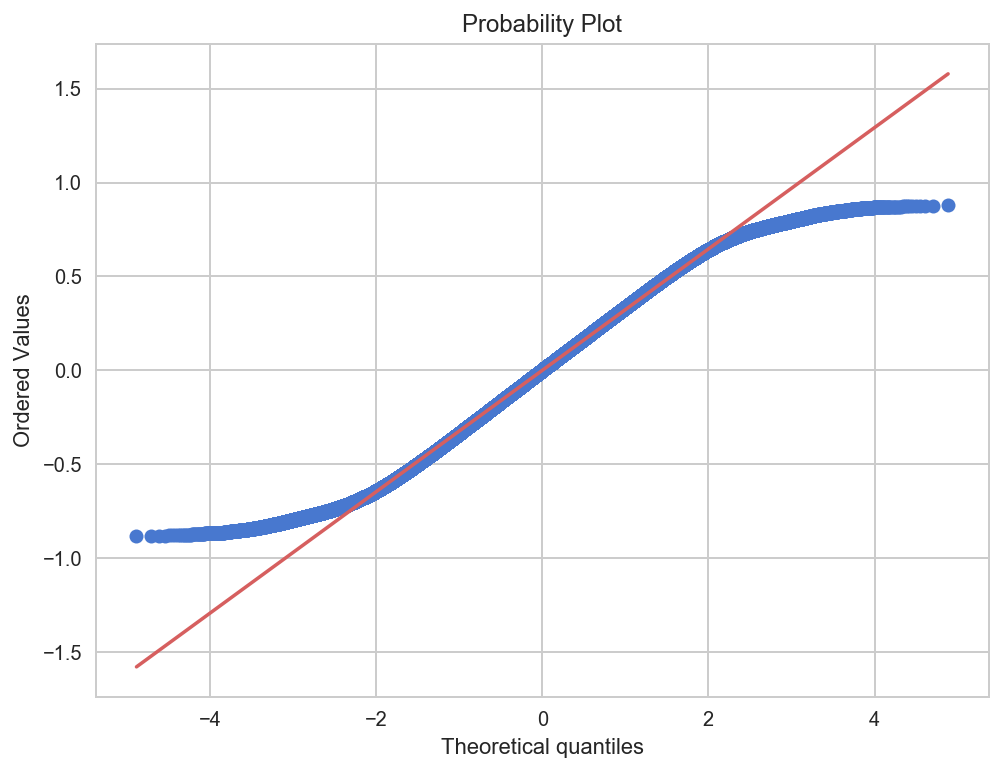

In [5]:
# probplot
f, ax = plt.subplots(figsize=(8, 6))
sp.stats.probplot(result.resid, plot = plt)

plt.show()

In [6]:
# Chi-square 확인
resid = sms.omni_normtest(result.resid)
for i in zip(['Chi^2', 'P-value'], resid):
    print("%-12s: %6.3f" % i)

Chi^2       : 18629.029
P-value     :  0.000


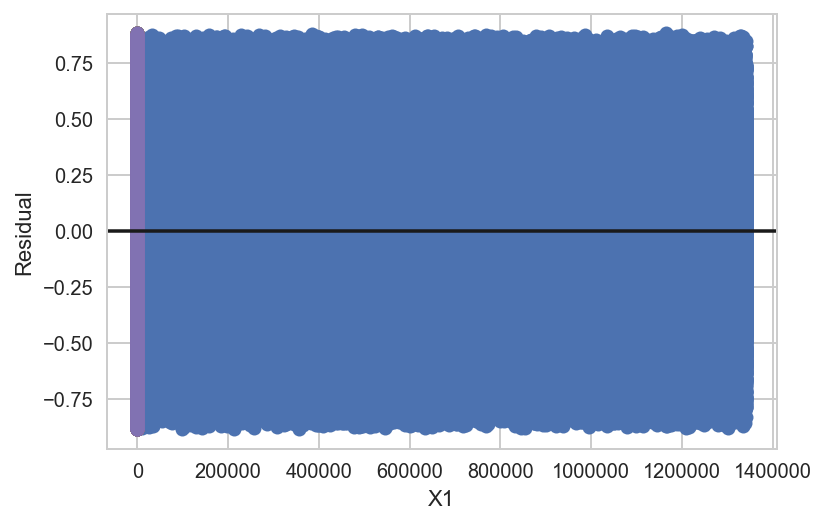

In [8]:
# check resid
plt.plot(final, result.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("X1")
plt.ylabel("Residual")
plt.show()